In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#load data
train = pd.read_csv("data/sales_train.csv")
test = pd.read_csv("data/test.csv")
cat = pd.read_csv("data/item_categories.csv")
items = pd.read_csv("data/items.csv")
shops = pd.read_csv("data/shops.csv")

In [3]:
#merge train data and items data to get category id
data = pd.merge(train, items[['item_id','item_category_id']], on = 'item_id', how = 'left')
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,-1.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56


In [4]:
data.date=data.date.apply(lambda x:dt.datetime.strptime(x, '%d.%m.%Y'))

In [5]:
data['month'] = data['date'].dt.month
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,month
0,2013-01-02,0,59,22154,999.00,1.0,37,1
1,2013-01-03,0,25,2552,899.00,1.0,58,1
2,2013-01-05,0,25,2552,899.00,-1.0,58,1
3,2013-01-06,0,25,2554,1709.05,1.0,58,1
4,2013-01-15,0,25,2555,1099.00,1.0,56,1


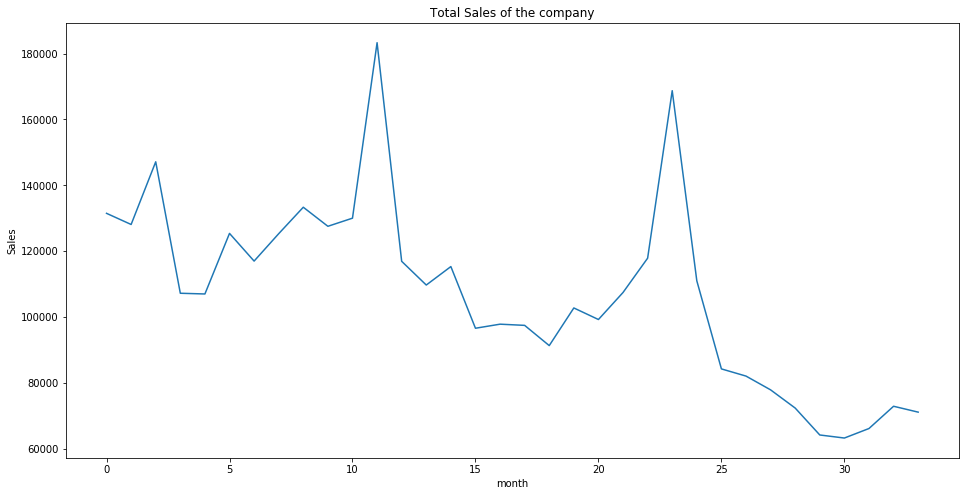

In [77]:
sales = data.groupby(["date_block_num"],as_index = False)["item_cnt_day"].sum()

plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
sns.lineplot(x = 'date_block_num', y = 'item_cnt_day', data = sales)
plt.xlabel('month')
plt.ylabel('Sales')
plt.show()

<Figure size 1152x576 with 0 Axes>

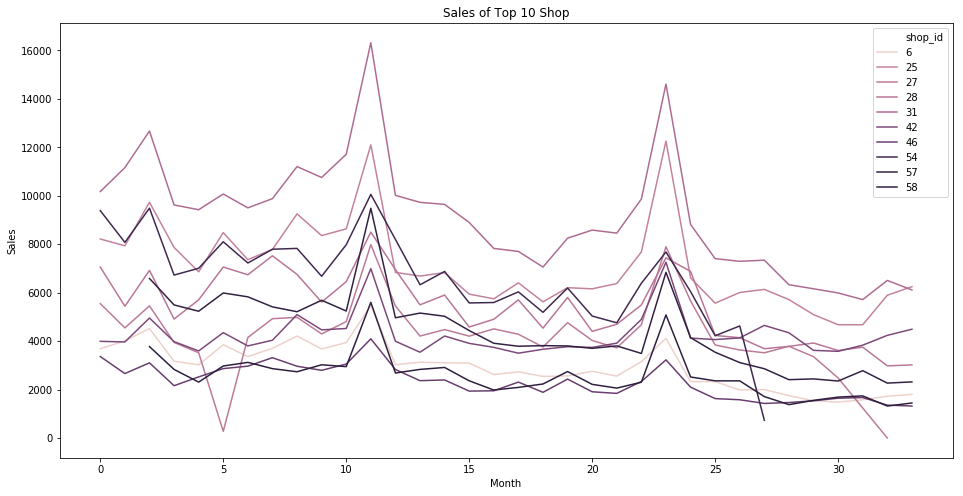

In [170]:
x = data.groupby(["shop_id"],as_index = False)["item_cnt_day"].sum()
x = x.sort_values(by='item_cnt_day',ascending=False)
x = x.iloc[0:10]
top10shop = x.shop_id.tolist()

temp = pd.DataFrame()
for i in top10shop:
    x = data.loc[(data.shop_id == i)]
    temp = temp.append(x)

temp = temp.groupby(["date_block_num","shop_id"],as_index = False)["item_cnt_day"].sum()    
    
plt.figure(figsize=(16,8))
sns.lineplot(x = 'date_block_num', y = 'item_cnt_day',data = temp, hue = 'shop_id', legend = 'full')
plt.title('Sales of Top 10 Shop')
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()

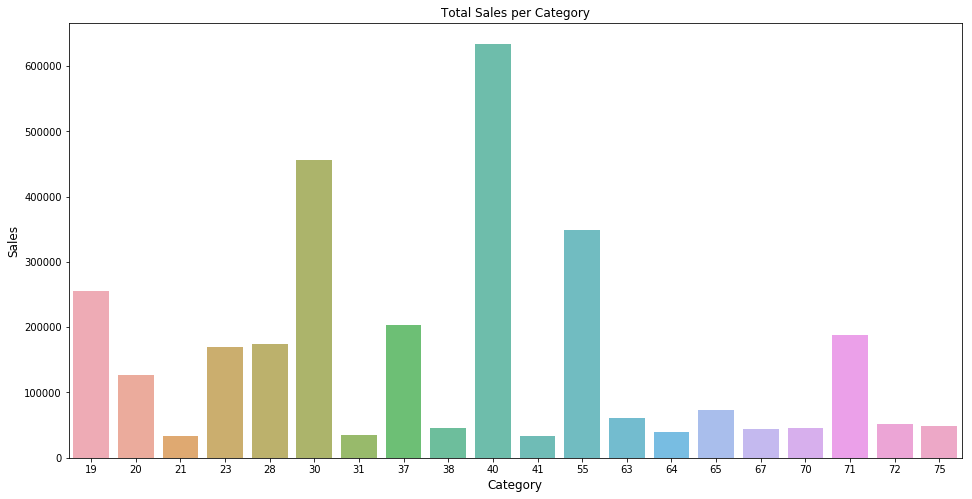

In [99]:
# number of items per cat 
x = data.groupby(['item_category_id'],as_index = False)['item_cnt_day'].sum()
x = x.sort_values(by='item_cnt_day',ascending=False)
x = x.iloc[0:20].reset_index()
# #plot
plt.figure(figsize=(16,8))
ax = sns.barplot(x.item_category_id, x.item_cnt_day, alpha=0.8)
plt.title("Total Sales per Category")
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()


In [103]:
#Feature Engineering
print('Number of unique in train dataset')
print(train.nunique())
print('-------------------------------------')
print('Number of unique in test dataset')
print(test.nunique())

Number of unique in train dataset
date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
dtype: int64
-------------------------------------
Number of unique in test dataset
ID         214200
shop_id        42
item_id      5100
dtype: int64


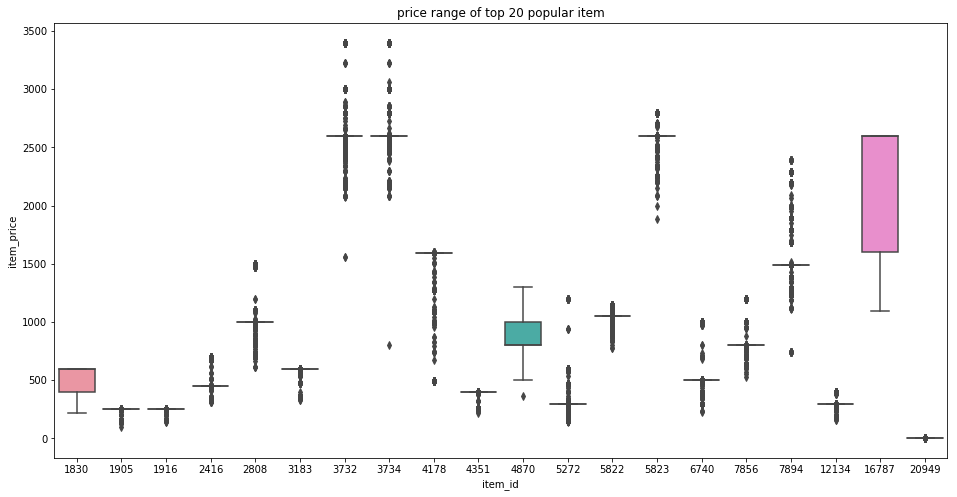

In [171]:
x = data.groupby(['item_id','item_price'],as_index = False)['date'].count()
x = x.sort_values(by='date',ascending=False)
x = x.iloc[0:20]
top20item = x.item_id.tolist()

temp = pd.DataFrame()
for i in top20item:
    x = data.loc[(data.item_id == i)]
    temp = temp.append(x)
    
plt.figure(figsize=(16,8))
sns.boxplot(x = 'item_id', y = 'item_price',data = temp)
plt.title('price range of top 20 popular item')
plt.show()

# Data Preprocessing

In [172]:
#missing value
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [183]:
#duplicate value
train[train.duplicated(keep='first')].count()

date              6
date_block_num    6
shop_id           6
item_id           6
item_price        6
item_cnt_day      6
dtype: int64

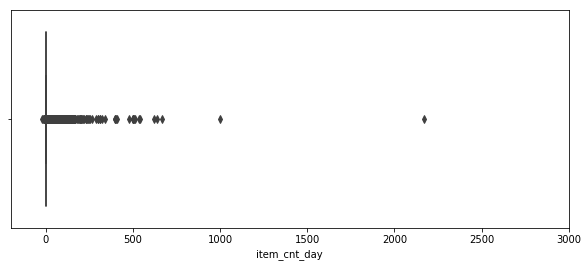

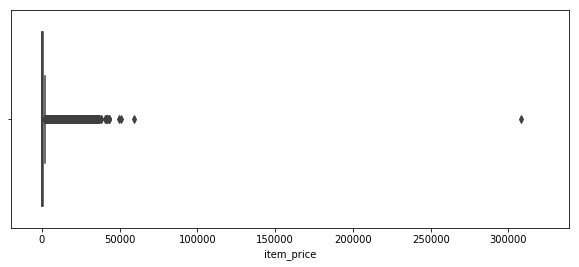

In [206]:
#Outliers
plt.figure(figsize=(10,4))
plt.xlim(-200, 3000)
sns.boxplot(x = train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(-20000, train.item_price.max()*1.1)
sns.boxplot(x = train.item_price)
plt.show()

